# 第6章 逻辑斯谛回归

逻辑斯谛回归(LR)是经典的分类方法

1．逻辑斯谛回归模型是由以下条件概率分布表示的分类模型。逻辑斯谛回归模型可以用于二类或多类分类。

$$P(Y=k | x)=\frac{\exp \left(w_{k} \cdot x\right)}{1+\sum_{k=1}^{K-1} \exp \left(w_{k} \cdot x\right)}, \quad k=1,2, \cdots, K-1$$

$$P(Y=K | x)=\frac{1}{1+\sum_{k=1}^{K-1} \exp \left(w_{k} \cdot x\right)}$$
这里，$x$为输入特征，$w$为特征的权值。

逻辑斯谛回归模型源自逻辑斯谛分布，其分布函数$F(x)$是$S$形函数。逻辑斯谛回归模型是由输入的线性函数表示的输出的对数几率模型。

2．最大熵模型是由以下条件概率分布表示的分类模型。最大熵模型也可以用于二类或多类分类。

$$P_{w}(y | x)=\frac{1}{Z_{w}(x)} \exp \left(\sum_{i=1}^{n} w_{i} f_{i}(x, y)\right)$$
$$Z_{w}(x)=\sum_{y} \exp \left(\sum_{i=1}^{n} w_{i} f_{i}(x, y)\right)$$

其中，$Z_w(x)$是规范化因子，$f_i$为特征函数，$w_i$为特征的权值。

3．最大熵模型可以由最大熵原理推导得出。最大熵原理是概率模型学习或估计的一个准则。最大熵原理认为在所有可能的概率模型（分布）的集合中，熵最大的模型是最好的模型。

最大熵原理应用到分类模型的学习中，有以下约束最优化问题：

$$\min -H(P)=\sum_{x, y} \tilde{P}(x) P(y | x) \log P(y | x)$$

$$s.t.  \quad P\left(f_{i}\right)-\tilde{P}\left(f_{i}\right)=0, \quad i=1,2, \cdots, n$$
 
 $$\sum_{y} P(y | x)=1$$
 
求解此最优化问题的对偶问题得到最大熵模型。

4．逻辑斯谛回归模型与最大熵模型都属于对数线性模型。

5．逻辑斯谛回归模型及最大熵模型学习一般采用极大似然估计，或正则化的极大似然估计。逻辑斯谛回归模型及最大熵模型学习可以形式化为无约束最优化问题。求解该最优化问题的算法有改进的迭代尺度法、梯度下降法、拟牛顿法。



回归模型：$f(x) = \frac{1}{1+e^{-wx}}$

其中wx线性函数：$wx =w_0\cdot x_0 + w_1\cdot x_1 + w_2\cdot x_2 +...+w_n\cdot x_n,(x_0=1)$


In [59]:
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [60]:
# data
def create_data():
    # 加载鸢尾花数据集
    iris = load_iris()
    # 创建一个包含数据的 Pandas DataFrame，列名为特征名
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    # 在 DataFrame 中添加一个新列 'label'，该列的值为目标标签
    df['label'] = iris.target
    # 修改 DataFrame 的列名
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    # 将 DataFrame 的前 100 行的某些列转换为 NumPy 数组
    # 选择列：'sepal length', 'sepal width' 以及 'label'
    data = np.array(df.iloc[:100, [0, 1, -1]])
    # 返回数据集的特征部分（前两列）和标签部分（最后一列）
    return data[:, :2], data[:, -1]

In [61]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [62]:
class LogisticReressionClassifier:
    def __init__(self, max_iter=200, learning_rate=0.01):
        # 初始化函数，设置最大迭代次数和学习率
        self.max_iter = max_iter
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        # Sigmoid函数，将输入映射到 (0, 1) 区间
        return 1 / (1 + exp(-x))

    def data_matrix(self, X):
        # 将输入特征矩阵转换为包含偏置项的格式
        data_mat = []
        for d in X:
            data_mat.append([1.0, *d])  # 在每行数据前加上1.0（偏置项）
        return data_mat

    def fit(self, X, y):
        # 训练模型
        data_mat = self.data_matrix(X)  # 将数据转换为包含偏置项的格式
        self.weights = np.zeros((len(data_mat[0]), 1), dtype=np.float32)  # 初始化权重为零向量

        # 利用交叉熵损失函数
        for iter_ in range(self.max_iter):
            # 遍历所有训练样本
            for i in range(len(X)):
                result = self.sigmoid(np.dot(data_mat[i], self.weights))  # 计算当前样本的预测值
                error = y[i] - result  # 计算预测误差
                self.weights += self.learning_rate * error * np.transpose([data_mat[i]])  # 更新权重

        # 输出训练好的模型参数
        print('LogisticRegression Model(learning_rate={},max_iter={})'.format(
            self.learning_rate, self.max_iter))
        
    def fit_(self, X, y):
        # 训练模型
        data_mat = self.data_matrix(X)  # 将数据转换为包含偏置项的格式
        self.weights = np.zeros((len(data_mat[0]), 1), dtype=np.float32)  # 初始化权重为零向量
    
        # 开始训练循环，最多迭代 max_iter 次
        for iter_ in range(self.max_iter):
            # 遍历所有训练样本
            total_loss = 0
            for i in range(len(X)):
                linear_score = np.dot(data_mat[i], self.weights)
                loss = y[i] * linear_score - np.log(1 + np.exp(linear_score))
                total_loss += loss
                gradient = data_mat[i] * (y[i] - (1 / (1 + np.exp(-linear_score))))
                self.weights += self.learning_rate * gradient.reshape(-1, 1)  # 更新权重
    
            # 输出当前迭代的平均损失
            avg_loss = total_loss / len(X)
            print(f"Iteration {iter_ + 1}, Average Loss: {avg_loss[0]}")
    
        # 输出训练好的模型参数
        print('LogisticRegression Model(learning_rate={},max_iter={})'.format(
            self.learning_rate, self.max_iter))

    def score(self, X_test, y_test):
        # 评估模型在测试集上的表现
        right = 0  # 统计预测正确的样本数量
        X_test = self.data_matrix(X_test)  # 将测试集数据转换为包含偏置项的格式
        # 遍历测试集中的每一个样本和对应的标签
        for x, y in zip(X_test, y_test):
            result = np.dot(x, self.weights)  # 计算当前样本的预测结果
            # 判断预测结果是否正确
            if (result > 0 and y == 1) or (result < 0 and y == 0):
                right += 1

        # 返回模型在测试集上的准确率
        return right / len(X_test)

In [63]:
lr_clf = LogisticReressionClassifier()
lr_clf.fit_(X_train, y_train)

Iteration 1, Average Loss: -0.7036740933809045
Iteration 2, Average Loss: -0.6558981486723917
Iteration 3, Average Loss: -0.613449471315136
Iteration 4, Average Loss: -0.5757373141476687
Iteration 5, Average Loss: -0.5421679609329938
Iteration 6, Average Loss: -0.5122079357568324
Iteration 7, Average Loss: -0.485386501333035
Iteration 8, Average Loss: -0.4612936093076639
Iteration 9, Average Loss: -0.4395749110769666
Iteration 10, Average Loss: -0.4199262183715575
Iteration 11, Average Loss: -0.40208670589577467
Iteration 12, Average Loss: -0.3858331622018654
Iteration 13, Average Loss: -0.37097446322569544
Iteration 14, Average Loss: -0.3573467068766147
Iteration 15, Average Loss: -0.34480902464432794
Iteration 16, Average Loss: -0.33324003374183986
Iteration 17, Average Loss: -0.32253483649700865
Iteration 18, Average Loss: -0.31260249899244574
Iteration 19, Average Loss: -0.3033639843549592
Iteration 20, Average Loss: -0.29475015147140277
Iteration 21, Average Loss: -0.2867007502274

In [64]:
lr_clf.score(X_test, y_test)

0.9666666666666667

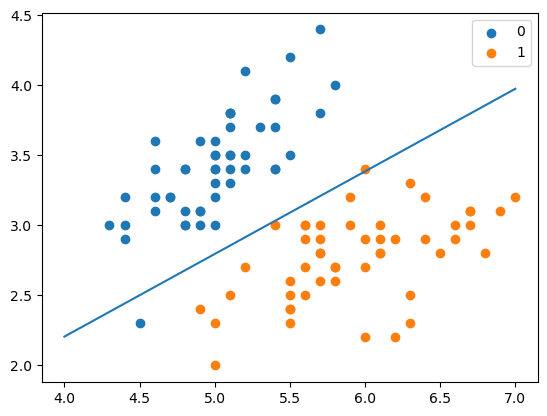

In [65]:
x_ponits = np.arange(4, 8)
y_ = -(lr_clf.weights[1]*x_ponits + lr_clf.weights[0])/lr_clf.weights[2]  # 基于 logistic 回归的决策边界的方程
plt.plot(x_ponits, y_)

#lr_clf.show_graph()
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

### scikit-learn实例

#### sklearn.linear_model.LogisticRegression

solver参数决定了我们对逻辑回归损失函数的优化方法，有四种算法可以选择，分别是：
- a) liblinear：使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数。
- b) lbfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
- c) newton-cg：也是牛顿法家族的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
- d) sag：即随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候。

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
clf = LogisticRegression(max_iter=200)

In [68]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [69]:
clf.score(X_test, y_test)

1.0

In [70]:
print(clf.coef_, clf.intercept_) 
# clf.coef_ 是一个二维数组，其中的每一行对应于一个类别的权重系数
# clf.intercept_ 是一个标量，表示模型的偏置

[[ 2.67911928 -2.65422492]] [-6.42769253]


C:\Users\Dell\AppData\Local\Temp\ipykernel_12000\1111466959.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X[:50, 0], X[:50, 1], 'bo', color='blue', label='0')


C:\Users\Dell\AppData\Local\Temp\ipykernel_12000\1111466959.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X[50:, 0], X[50:, 1], 'bo', color='orange', label='1')


Text(0.5, 0, 'sepal length')

Text(0, 0.5, 'sepal width')

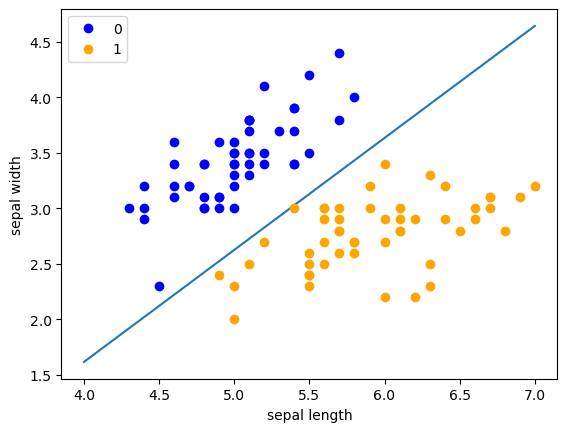

In [71]:
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

plt.plot(X[:50, 0], X[:50, 1], 'bo', color='blue', label='0')
plt.plot(X[50:, 0], X[50:, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## 最大熵模型

In [72]:
import math
from copy import deepcopy

In [74]:
class MaxEntropy:
    def __init__(self, EPS=0.005):
        # 初始化函数，设置模型参数和属性
        self._samples = []  # 样本集合
        self._Y = set()  # 标签集合，相当于去重后的y
        self._numXY = {}  # key为(x,y)，value为出现次数
        self._N = 0  # 样本数
        self._Ep_ = []  # 样本分布的特征期望值
        self._xyID = {}  # key记录(x,y)，value记录id号
        self._n = 0  # 特征键值(x,y)的个数
        self._C = 0  # 最大特征数
        self._IDxy = {}  # key为(x,y)，value为对应的id号
        self._w = []  # 参数向量
        self._EPS = EPS  # 收敛条件
        self._lastw = []  # 上一次w参数值


    def loadData(self, dataset):
        # 加载数据，初始化模型的样本集合和相关统计信息
        self._samples = deepcopy(dataset)  # 深拷贝样本数据集
        for items in self._samples:
            y = items[0]  # 提取标签
            X = items[1:]  # 提取特征
            self._Y.add(y)  # 添加标签到集合中，会自动去重(set特性)
            for x in X:
                if (x, y) in self._numXY:
                    self._numXY[(x, y)] += 1  # 统计特征-标签对出现次数
                else:
                    self._numXY[(x, y)] = 1

        self._N = len(self._samples)  # 样本数
        self._n = len(self._numXY)  # 特征键值(x,y)的个数
        self._C = max([len(sample) - 1 for sample in self._samples])  # 最大特征数
        print('self._C',self._C)
        self._w = [0] * self._n  # 参数向量初始化为0
        self._lastw = self._w[:]  # 上一次w参数值初始化为当前参数向量的拷贝


    def _Zx(self, X):  # 计算每个Z(x)值
        zx = 0
        for y in self._Y:
            ss = 0
            for x in X:
                if (x, y) in self._numXY:
                    ss += self._w[self._xyID[(x, y)]]
            zx += math.exp(ss)
        return zx

    def _model_pyx(self, y, X):  # 计算每个P(y|x)
        zx = self._Zx(X)
        ss = 0
        for x in X:
            if (x, y) in self._numXY:
                ss += self._w[self._xyID[(x, y)]]
        pyx = math.exp(ss) / zx
        return pyx

    def _model_ep(self, index):  # 计算特征函数fi关于模型的期望
        x, y = self._IDxy[index]
        ep = 0
        for sample in self._samples:
            if x not in sample:
                continue
            pyx = self._model_pyx(y, sample)
            ep += pyx / self._N
        return ep

    def _convergence(self):  # 判断是否全部收敛
        for last, now in zip(self._lastw, self._w):
            if abs(last - now) >= self._EPS:
                return False
        return True

    def predict(self, X):  # 计算预测概率
        Z = self._Zx(X)
        result = {}
        for y in self._Y:
            ss = 0
            for x in X:
                if (x, y) in self._numXY:
                    ss += self._w[self._xyID[(x, y)]]
            pyx = math.exp(ss) / Z
            result[y] = pyx
        return result

    def train(self, maxiter=1000):  # 训练数据
        for loop in range(maxiter):  # 最大训练次数
            print("iter:%d" % loop)
            self._lastw = self._w[:]
            for i in range(self._n):
                ep = self._model_ep(i)  # 计算第i个特征的模型期望
                self._w[i] += math.log(self._Ep_[i] / ep) / self._C  # 更新参数
            print("w:", self._w)
            if self._convergence():  # 判断是否收敛
                break

In [75]:
dataset = [['no', 'sunny', 'hot', 'high', 'FALSE'],
           ['no', 'sunny', 'hot', 'high', 'TRUE'],
           ['yes', 'overcast', 'hot', 'high', 'FALSE'],
           ['yes', 'rainy', 'mild', 'high', 'FALSE'],
           ['yes', 'rainy', 'cool', 'normal', 'FALSE'],
           ['no', 'rainy', 'cool', 'normal', 'TRUE'],
           ['yes', 'overcast', 'cool', 'normal', 'TRUE'],
           ['no', 'sunny', 'mild', 'high', 'FALSE'],
           ['yes', 'sunny', 'cool', 'normal', 'FALSE'],
           ['yes', 'rainy', 'mild', 'normal', 'FALSE'],
           ['yes', 'sunny', 'mild', 'normal', 'TRUE'],
           ['yes', 'overcast', 'mild', 'high', 'TRUE'],
           ['yes', 'overcast', 'hot', 'normal', 'FALSE'],
           ['no', 'rainy', 'mild', 'high', 'TRUE']]

In [77]:
maxent = MaxEntropy()
x = ['overcast', 'mild', 'high', 'FALSE']

In [78]:
maxent.loadData(dataset)
maxent.train()

self._C 4
iter:0


KeyError: 0

w: [3.072401354346423, 0.05152368755845623, 1.324329440803341, -3.604989866264362, 1.41383640527485, 4.351267819867435, -0.15025956774941518, -1.82471772799133, 1.2024803106132318, -1.5392381720577446, 1.6065771965053417, -1.0081391491399183, 1.4167221066881721, 2.440811117232699, 3.1461267401736226, -7.665250511379017, -1.4940558672335864, -2.8467590311525273, -4.515881806034199]
iter:370
w: [3.0755723390526657, 0.051419669606656095, 1.3257154648601595, -3.6086918543392765, 1.4154541461625751, 4.355369188646386, -0.1501585866486983, -1.8266072390984893, 1.203691983917878, -1.5407298790153576, 1.6080037003315935, -1.0092863417347469, 1.418070532948445, 2.443046599732054, 3.1495478655934694, -7.673341026027711, -1.4957010161026607, -2.8495236057051847, -4.520727291418829]
iter:371
w: [3.0787368818807574, 0.051316204308247404, 1.3270984025210846, -3.612386311193376, 1.417068568196473, 4.35946247751384, -0.1500581341942337, -1.8284925041361642, 1.204901219499545, -1.542218814197034, 1.609

w: [3.6015329594794765, 0.038265501272679074, 1.5523288786111267, -4.222262054134928, 1.6832687748426098, 5.038607357554067, -0.1373239820669217, -2.1349740005220674, 1.4048899060468283, -1.791170939591513, 1.842182688923127, -1.193285018673065, 1.6395928510086861, 2.818370308534102, 3.6983167088449638, -9.002948004586703, -1.7674139548926897, -3.305525361167321, -5.323096924354977]
iter:568
w: [3.603806297000422, 0.03822364679343828, 1.553296323261703, -4.224911120650935, 1.6844240690492072, 5.041571047251153, -0.13728293526856802, -2.136287900426324, 1.4057601550170977, -1.7922640981364317, 1.8431861696080705, -1.1940574751416748, 1.6405423183350545, 2.820008647165862, 3.700621129406547, -9.008648253720411, -1.7685835818499134, -3.3074876083870652, -5.326559030134903]
iter:569
w: [3.6060764306311675, 0.038181958633116665, 1.5542623188478286, -4.227556423690558, 1.6855777165504218, 5.044530633655842, -0.1372420502040481, -2.1375998098192484, 1.4066291808806, -1.7933557897920438, 1.844

In [19]:
print('predict:', maxent.predict(x))

predict: {'yes': 0.9999971802186581, 'no': 2.819781341881656e-06}


## 第6章Logistic回归与最大熵模型-习题

### 习题6.1
&emsp;&emsp;确认Logistic分布属于指数分布族。

**解答：**  
**第1步：**  
首先给出指数分布族的定义：  
对于随机变量$x$，在给定参数$\eta$下，其概率分别满足如下形式：$$p(x|\eta)=h(x)g(\eta)\exp(\eta^Tu(x))$$我们称之为**指数分布族**。  
其中：  
$x$：可以是标量或者向量，可以是离散值也可以是连续值  
$\eta$：自然参数  
$g(\eta)$：归一化系数  
$h(x),u(x)$：$x$的某个函数  

----

**第2步：**证明伯努利分布属于指数分布族  
伯努利分布：$\varphi$是$y=1$的概率，即$P(Y=1)=\varphi$  
$\begin{aligned}
P(y|\varphi) 
&= \varphi^y (1-\varphi)^{(1-y)} \\
&= (1-\varphi) \varphi^y (1-\varphi)^{(-y)} \\
&= (1-\varphi) (\frac{\varphi}{1-\varphi})^y \\
&= (1-\varphi) \exp\left(y \ln \frac{\varphi}{1-\varphi} \right) \\
&= \frac{1}{1+e^\eta} \exp (\eta y)
\end{aligned}$  
其中，$\displaystyle \eta=\ln \frac{\varphi}{1-\varphi} \Leftrightarrow \varphi = \frac{1}{1+e^{-\eta}}$  
将$y$替换成$x$，可得$\displaystyle P(x|\eta) = \frac{1}{1+e^\eta} \exp (\eta x)$
对比可知，伯努利分布属于指数分布族，其中$\displaystyle h(x) = 1, g(\eta)= \frac{1}{1+e^\eta}, u(x)=x$  

----

**第3步：**  
广义线性模型（GLM）必须满足三个假设：
1. $y | x;\theta \sim ExponentialFamily(\eta)$，即假设预测变量$y$在给定$x$，以$\theta$为参数的条件概率下，属于以$\eta$作为自然参数的指数分布族；  
2. 给定$x$，求解出以$x$为条件的$T(y)$的期望$E[T(y)|x]$，即算法输出为$h(x)=E[T(y)|x]$  
3. 满足$\eta=\theta^T x$，即自然参数和输入特征向量$x$之间线性相关，关系由$\theta$决定，仅当$\eta$是实数时才有意义，若$\eta$是一个向量，则$\eta_i=\theta_i^T x$

----

**第4步：**推导伯努利分布的GLM  
已知伯努利分布属于指数分布族，对给定的$x,\eta$，求解期望：$$\begin{aligned}
h_{\theta}(x) 
&= E[y|x;\theta] \\
&= 1 \cdot p(y=1)+ 0 \cdot p(y=0) \\
&= \varphi \\
&= \frac{1}{1+e^{-\eta}} \\
&= \frac{1}{1+e^{-\theta^T x}}
\end{aligned}$$可得到Logistic回归算法，故Logistic分布属于指数分布族，得证。

### 习题6.2
&emsp;&emsp;写出Logistic回归模型学习的梯度下降算法。

**解答：**  
对于Logistic模型：$$P(Y=1 | x)=\frac{\exp (w \cdot x+b)}{1+\exp (w \cdot x+b)} \\ P(Y=0 | x)=\frac{1}{1+\exp (w \cdot x+b)}
$$对数似然函数为：$\displaystyle L(w)=\sum_{i=1}^N \left[y_i (w \cdot x_i)-\log \left(1+\exp (w \cdot x_i)\right)\right]$  
似然函数求偏导，可得$\displaystyle \frac{\partial L(w)}{\partial w^{(j)}}=\sum_{i=1}^N\left[x_i^{(j)} \cdot y_i-\frac{\exp (w \cdot x_i) \cdot x_i^{(j)}}{1+\exp (w \cdot x_i)}\right]$  
梯度函数为：$\displaystyle \nabla L(w)=\left[\frac{\partial L(w)}{\partial w^{(0)}}, \cdots, \frac{\partial L(w)}{\partial w^{(m)}}\right]$  
Logistic回归模型学习的梯度下降算法：  
(1) 取初始值$x^{(0)} \in R$，置$k=0$  
(2) 计算$f(x^{(k)})$  
(3) 计算梯度$g_k=g(x^{(k)})$，当$\|g_k\| < \varepsilon$时，停止迭代，令$x^* = x^{(k)}$；否则，求$\lambda_k$，使得$\displaystyle f(x^{(k)}+\lambda_k g_k) = \max_{\lambda \geqslant 0}f(x^{(k)}+\lambda g_k)$  
(4) 置$x^{(k+1)}=x^{(k)}+\lambda_k g_k$，计算$f(x^{(k+1)})$，当$\|f(x^{(k+1)}) - f(x^{(k)})\| < \varepsilon$或 $\|x^{(k+1)} - x^{(k)}\| < \varepsilon$时，停止迭代，令$x^* = x^{(k+1)}$  
(5) 否则，置$k=k+1$，转(3)

In [20]:
%matplotlib inline
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import mpl

# 图像显示中文
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']


class LogisticRegression:
    def __init__(self, learn_rate=0.1, max_iter=10000, tol=1e-2):
        self.learn_rate = learn_rate  # 学习率
        self.max_iter = max_iter  # 迭代次数
        self.tol = tol  # 迭代停止阈值
        self.w = None  # 权重

    def preprocessing(self, X):
        """将原始X末尾加上一列，该列数值全部为1"""
        row = X.shape[0]
        y = np.ones(row).reshape(row, 1)
        X_prepro = np.hstack((X, y))
        return X_prepro

    def sigmod(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X_train, y_train):
        X = self.preprocessing(X_train)
        y = y_train.T
        # 初始化权重w
        self.w = np.array([[0] * X.shape[1]], dtype=np.float)
        k = 0
        for loop in range(self.max_iter):
            # 计算梯度
            z = np.dot(X, self.w.T)
            grad = X * (y - self.sigmod(z))
            grad = grad.sum(axis=0)
            # 利用梯度的绝对值作为迭代中止的条件
            if (np.abs(grad) <= self.tol).all():
                break
            else:
                # 更新权重w 梯度上升——求极大值
                self.w += self.learn_rate * grad
                k += 1
        print("迭代次数：{}次".format(k))
        print("最终梯度：{}".format(grad))
        print("最终权重：{}".format(self.w[0]))

    def predict(self, x):
        p = self.sigmod(np.dot(self.preprocessing(x), self.w.T))
        print("Y=1的概率被估计为：{:.2%}".format(p[0][0]))  # 调用score时，注释掉
        p[np.where(p > 0.5)] = 1
        p[np.where(p < 0.5)] = 0
        return p

    def score(self, X, y):
        y_c = self.predict(X)
        error_rate = np.sum(np.abs(y_c - y.T)) / y_c.shape[0]
        return 1 - error_rate

    def draw(self, X, y):
        # 分离正负实例点
        y = y[0]
        X_po = X[np.where(y == 1)]
        X_ne = X[np.where(y == 0)]
        # 绘制数据集散点图
        ax = plt.axes(projection='3d')
        x_1 = X_po[0, :]
        y_1 = X_po[1, :]
        z_1 = X_po[2, :]
        x_2 = X_ne[0, :]
        y_2 = X_ne[1, :]
        z_2 = X_ne[2, :]
        ax.scatter(x_1, y_1, z_1, c="r", label="正实例")
        ax.scatter(x_2, y_2, z_2, c="b", label="负实例")
        ax.legend(loc='best')
        # 绘制p=0.5的区分平面
        x = np.linspace(-3, 3, 3)
        y = np.linspace(-3, 3, 3)
        x_3, y_3 = np.meshgrid(x, y)
        a, b, c, d = self.w[0]
        z_3 = -(a * x_3 + b * y_3 + d) / c
        ax.plot_surface(x_3, y_3, z_3, alpha=0.5)  # 调节透明度
        plt.show()

迭代次数：3232次
最终梯度：[ 0.00144779  0.00046133  0.00490279 -0.00999848]
最终权重：[  2.96908597   1.60115396   5.04477438 -13.43744079]


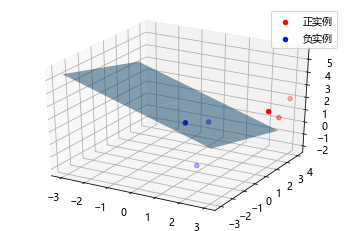

In [21]:
# 训练数据集
X_train = np.array([[3, 3, 3], [4, 3, 2], [2, 1, 2], [1, 1, 1], [-1, 0, 1],
                    [2, -2, 1]])
y_train = np.array([[1, 1, 1, 0, 0, 0]])
# 构建实例，进行训练
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.draw(X_train, y_train)

### 习题6.3
&emsp;&emsp;写出最大熵模型学习的DFP算法。（关于一般的DFP算法参见附录B）

**解答：**  
**第1步：**  
最大熵模型为：$$
\begin{array}{cl}
{\max } & {H(p)=-\sum_{x, y} P(x) P(y | x) \log P(y | x)} \\ 
{\text {st.}} &
{E_p(f_i)-E_{\hat{p}}(f_i)=0, \quad i=1,2, \cdots,n} \\ 
& {\sum_y P(y | x)=1}
\end{array}$$引入拉格朗日乘子，定义拉格朗日函数：$$
L(P, w)=\sum_{xy} P(x) P(y | x) \log P(y | x)+w_0 \left(1-\sum_y P(y | x)\right) \\
+\sum_{i=1} w_i\left(\sum_{xy} P(x, y) f_i(x, y)-\sum_{xy} P(x, y) P(y | x) f_i(x, y)\right)$$
最优化原始问题为：$$\min_{P \in C} \max_{w} L(P,w)$$对偶问题为：$$\max_{w} \min_{P \in C} L(P,w)$$令$$\Psi(w) = \min_{P \in C} L(P,w) = L(P_w, w)$$$\Psi(w)$称为对偶函数，同时，其解记作$$P_w = \mathop{\arg \min}_{P \in C} L(P,w) = P_w(y|x)$$求$L(P,w)$对$P(y|x)$的偏导数，并令偏导数等于0，解得：$$P_w(y | x)=\frac{1}{Z_w(x)} \exp \left(\sum_{i=1}^n w_i f_i (x, y)\right)$$其中：$$Z_w(x)=\sum_y \exp \left(\sum_{i=1}^n w_i f_i(x, y)\right)$$则最大熵模型目标函数表示为$$\varphi(w)=\min_{w \in R_n} \Psi(w) = \sum_{x} P(x) \log \sum_{y} \exp \left(\sum_{i=1}^{n} w_{i} f_{i}(x, y)\right)-\sum_{x, y} P(x, y) \sum_{i=1}^{n} w_{i} f_{i}(x, y)$$  

**第2步：**  
DFP的$G_{k+1}$的迭代公式为：$$G_{k+1}=G_k+\frac{\delta_k \delta_k^T}{\delta_k^T y_k}-\frac{G_k y_k y_k^T G_k}{y_k^T G_k y_k}$$  
**最大熵模型的DFP算法：**   
输入：目标函数$\varphi(w)$，梯度$g(w) = \nabla g(w)$，精度要求$\varepsilon$；  
输出：$\varphi(w)$的极小值点$w^*$  
(1)选定初始点$w^{(0)}$，取$G_0$为正定对称矩阵，置$k=0$  
(2)计算$g_k=g(w^{(k)})$，若$\|g_k\| < \varepsilon$，则停止计算，得近似解$w^*=w^{(k)}$，否则转(3)  
(3)置$p_k=-G_kg_k$  
(4)一维搜索：求$\lambda_k$使得$$\varphi\left(w^{(k)}+\lambda_k P_k\right)=\min _{\lambda \geqslant 0} \varphi\left(w^{(k)}+\lambda P_{k}\right)$$(5)置$w^{(k+1)}=w^{(k)}+\lambda_k p_k$  
(6)计算$g_{k+1}=g(w^{(k+1)})$，若$\|g_{k+1}\| < \varepsilon$，则停止计算，得近似解$w^*=w^{(k+1)}$；否则，按照迭代式算出$G_{k+1}$  
(7)置$k=k+1$，转(3)  

----
参考代码：https://github.com/wzyonggege/statistical-learning-method

本文代码更新地址：https://github.com/fengdu78/lihang-code

习题解答：https://github.com/datawhalechina/statistical-learning-method-solutions-manual

中文注释制作：机器学习初学者公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)